### Compare optimizers on MNIST dataset

In [1]:
from __future__ import print_function
import tensorflow as tf
from tqdm import tqdm_notebook   
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='darkgrid')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Step   0, Minibatch Loss= 3558.1660, Training Accuracy= 0.243
Step   1, Minibatch Loss= 4018.7786, Training Accuracy= 0.361
Step 100, Minibatch Loss= 132.0378, Training Accuracy= 0.845
Step 200, Minibatch Loss= 92.3341, Training Accuracy= 0.876
Step 300, Minibatch Loss= 72.5504, Training Accuracy= 0.860
Step 400, Minibatch Loss= 50.1945, Training Accuracy= 0.874
Step 500, Minibatch Loss= 49.9661, Training Accuracy= 0.872
Optimization Finished!


Step   0, Minibatch Loss= 4347.1025, Training Accuracy= 0.345
Step   1, Minibatch Loss= 5629.8330, Training Accuracy= 0.337
Step 100, Minibatch Loss= 107.0748, Training Accuracy= 0.860
Step 200, Minibatch Loss= 50.5496, Training Accuracy= 0.897
Step 300, Minibatch Loss= 41.1032, Training Accuracy= 0.897
Step 400, Minibatch Loss= 68.0427, Training Accuracy= 0.851
Step 500, Minibatch Loss= 29.4299, Training Accuracy= 0.899
Optimization Finished!


Step   0, Minibatch Loss= 5692.8838, Training Accuracy= 0.297
Step   1, Minibatch Loss= 7116.1440, Training Accuracy= 0.412
Step 100, Minibatch Loss= 69.5785, Training Accuracy= 0.905
Step 200, Minibatch Loss= 27.8013, Training Accuracy= 0.900
Step 300, Minibatch Loss= 20.3332, Training Accuracy= 0.908
Step 400, Minibatch Loss= 20.1800, Training Accuracy= 0.909
Step 500, Minibatch Loss= 16.8666, Training Accuracy= 0.892
Optimization Finished!


Step   0, Minibatch Loss= 3540.2688, Training Accuracy= 0.089
Step   1, Minibatch Loss= 3237.1240, Training Accuracy= 0.090
Step 100, Minibatch Loss= 51.1885, Training Accuracy= 0.887
Step 200, Minibatch Loss= 21.5036, Training Accuracy= 0.902
Step 300, Minibatch Loss= 15.5927, Training Accuracy= 0.901
Step 400, Minibatch Loss= 13.2973, Training Accuracy= 0.915
Step 500, Minibatch Loss= 15.6632, Training Accuracy= 0.876
Optimization Finished!


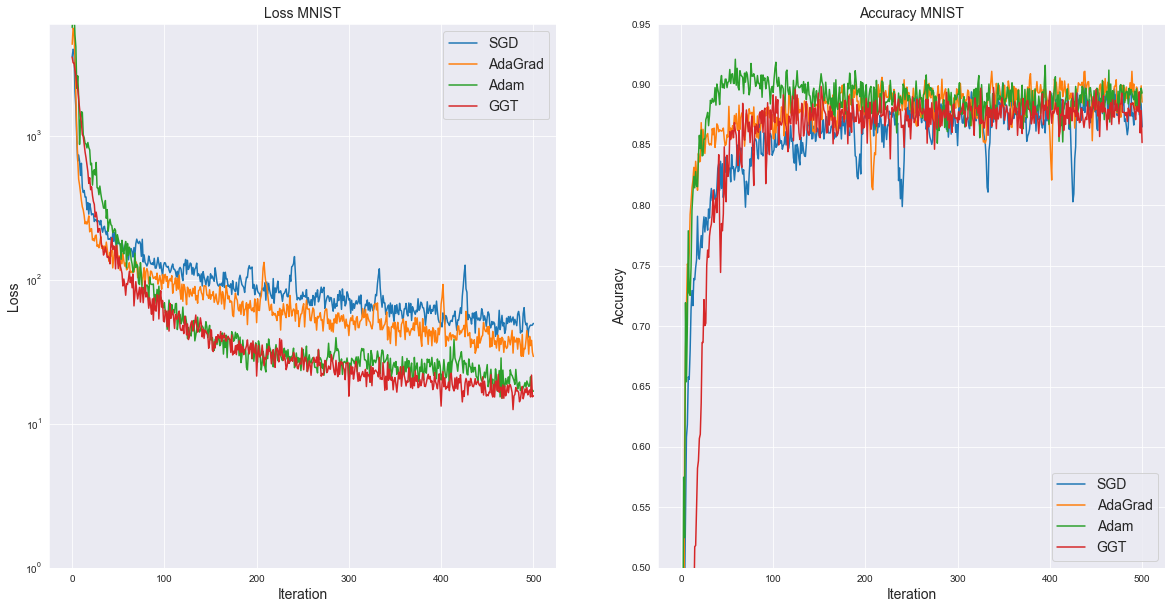

In [110]:
def opt_test_MNIST (optimizer,  
                    data,
                    num_steps = 500,
                    batch_size = 128,
                    display_step = 100):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = np.empty(num_steps+1)
    Accur = np.empty(num_steps+1)
    
    #Start training
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)

        for step in tqdm_notebook(range(0, num_steps+1)):
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            Loss[step], Accur[step], _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                Loss[step] = loss
                
                print("Step {:3}".format(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")
        return (Loss, Accur)

tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.05
num_steps = 500
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.train.AdagradOptimizer(learning_rate),
              tf.train.AdamOptimizer(learning_rate),
              tf.contrib.opt.GGTOptimizer(5 * learning_rate, window=20)
             ]

x_range = np.arange(0, num_steps+1)
plt.figure(figsize=(20,10))
    
for opt in optimizers:
    Loss, Accur = opt_test_MNIST(opt, mnist, num_steps, batch_size=2000)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT'], fontsize=14)
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylim(0.5, 0.95)
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT'], fontsize=14)

plt.savefig("MNIST.png")
plt.show()

## Syntetic test ill-conditional Gaussion destribution

In [78]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

9999.999999999998

In [79]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

Size, _ = X_train.shape

In [80]:
X_train.shape, y_train.shape, y_train.mean(), Size

((1000, 10), (1000, 1), 0.533, 1000)

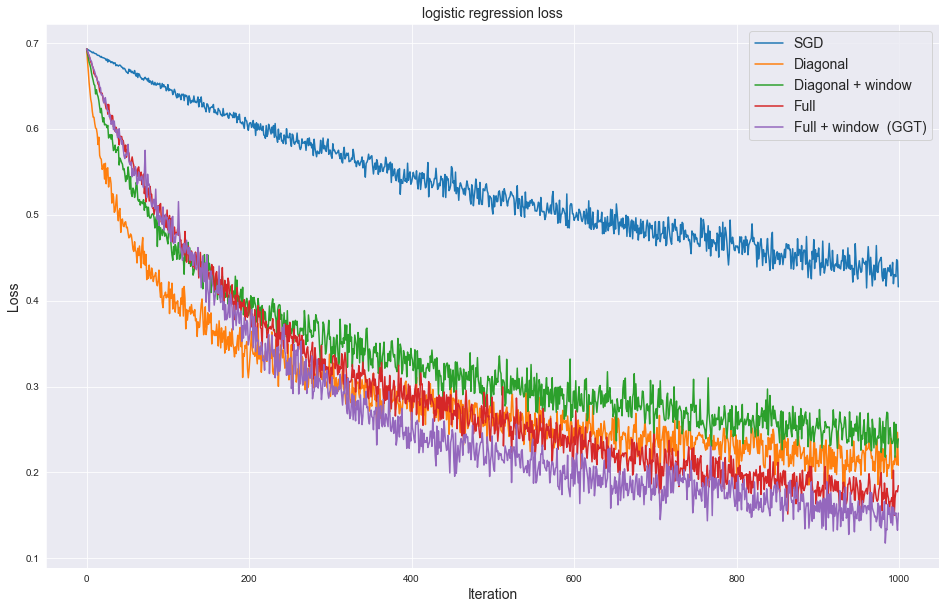

In [81]:
import tensorflow as tf

# hyperparameters
learning_rate = 0.1
display_step = 1

def Syntetic_test_1 (opt, batch_size = 256):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    y = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([1]))

    #function
    y_ = tf.matmul(X, W) + b
    #logistic regression loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_))
    optimizer = opt.minimize(loss)

    Loss = np.empty(num_epochs+1)
    
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            idx = np.random.choice(Size, batch_size)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train[idx], y: y_train[idx]})

    #     # Test model
    #     correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    #     # Calculate accuracy for 3000 examples
    #     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #     print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
    return (Loss)
   
    
learning_rate = 0.05
num_epochs = 1000
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.train.AdagradOptimizer(learning_rate, ),
              tf.train.AdagradOptimizer(learning_rate, initial_accumulator_value=0.9),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=500, beta1=0.),
              tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20, beta1=0.)
             ]

x_range = np.arange(0, num_epochs+1)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss = Syntetic_test_1(opt)
    plt.plot(x_range[:-1], Loss[:-1])
    
plt.title('logistic regression loss', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.legend(['SGD', 'Diagonal', 'Diagonal + window', 'Full', 'Full + window  (GGT)'], fontsize=14)
plt.savefig("Syntetic_1.png")
plt.show()

### Syntetic test log-barrier function loss

In [85]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
c = np.empty((1500, 1))
c[:, 0] = np.random.uniform(0, 1, 1500)

plane = np.random.randn(10)

X_train, X_test = X[:1000], X[1000:]
c_train, c_test = c[:1000], c[1000:]

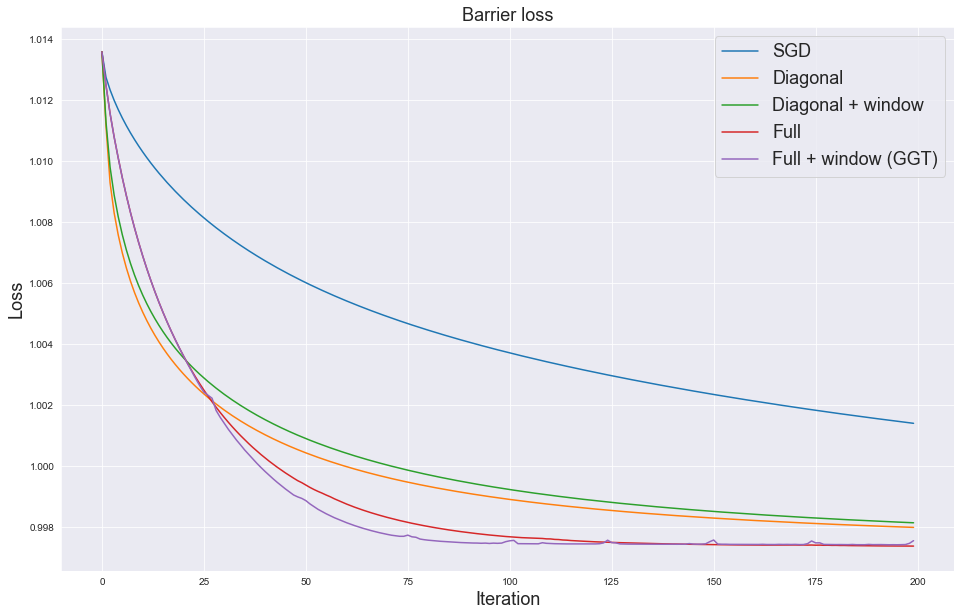

In [108]:
import tensorflow as tf

# hyperparameters
num_epochs = 200

def Syntetic_test_2 (opt, batch_size = 1000):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    c = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))

    #function
    y_ = tf.matmul(X, W) + c
    compr = tf.less(tf.constant(0., "float", shape=[batch_size]), y_[:, 0])
    
    loss = tf.reduce_mean(tf.where(compr, -tf.log(y_), tf.constant(1000, "float", [batch_size, 1])))
    #logistic regression loss
    optimizer = opt.minimize(loss)

    Loss = np.empty(num_epochs+1)

    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            idx = np.random.choice(Size, batch_size)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train, c: c_train})

    #     # Test model
    #     correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    #     # Calculate accuracy for 3000 examples
    #     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #     print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
    return (Loss)
   
    
learning_rate = 0.001
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.train.AdagradOptimizer(learning_rate),
              tf.train.AdagradOptimizer(learning_rate, initial_accumulator_value=1.),
              tf.contrib.opt.GGTOptimizer(learning_rate / 2, window=500, beta1=0.),
              tf.contrib.opt.GGTOptimizer(learning_rate / 2, window=20, beta1=0.)
             ]

x_range = np.arange(0, num_epochs+1)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss = Syntetic_test_2(opt)
    plt.plot(x_range[:-1], Loss[:-1])
    
plt.title('Barrier loss', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Iteration', fontsize=18)
plt.legend(['SGD', 'Diagonal', 'Diagonal + window', 'Full', 'Full + window (GGT)'], fontsize=18)
plt.savefig("Syntetic_2.png")
plt.show()

### Window size

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Step   0, Minibatch Loss= 3895.4678, Training Accuracy= 0.083
Step   1, Minibatch Loss= 3540.8296, Training Accuracy= 0.069
Step 100, Minibatch Loss= 76.5321, Training Accuracy= 0.863
Step 200, Minibatch Loss= 27.2273, Training Accuracy= 0.896
Step 300, Minibatch Loss= 24.1878, Training Accuracy= 0.892
Step 400, Minibatch Loss= 17.5654, Training Accuracy= 0.887
Step 500, Minibatch Loss= 14.0007, Training Accuracy= 0.910
Optimization Finished!


Step   0, Minibatch Loss= 5339.8071, Training Accuracy= 0.058
Step   1, Minibatch Loss= 34458.3984, Training Accuracy= 0.095
Step 100, Minibatch Loss= 64.8215, Training Accuracy= 0.876
Step 200, Minibatch Loss= 23.6871, Training Accuracy= 0.893
Step 300, Minibatch Loss= 16.6156, Training Accuracy= 0.905
Step 400, Minibatch Loss= 13.8704, Training Accuracy= 0.898
Step 500, Minibatch Loss= 12.0573, Training Accuracy= 0.910
Optimization Finished!


Step   0, Minibatch Loss= 2759.3010, Training Accuracy= 0.102
Step   1, Minibatch Loss= 2282.3311, Training Accuracy= 0.164
Step 100, Minibatch Loss= 36.4818, Training Accuracy= 0.860
Step 200, Minibatch Loss= 19.4443, Training Accuracy= 0.889
Step 300, Minibatch Loss= 19.4286, Training Accuracy= 0.878
Step 400, Minibatch Loss= 13.7254, Training Accuracy= 0.900
Step 500, Minibatch Loss= 12.2852, Training Accuracy= 0.896
Optimization Finished!


Step   0, Minibatch Loss= 3320.7283, Training Accuracy= 0.085
Step   1, Minibatch Loss= 2725.2795, Training Accuracy= 0.125
Step 100, Minibatch Loss= 41.1480, Training Accuracy= 0.894
Step 200, Minibatch Loss= 27.2434, Training Accuracy= 0.891
Step 300, Minibatch Loss= 27.4024, Training Accuracy= 0.888
Step 400, Minibatch Loss= 18.6264, Training Accuracy= 0.890
Step 500, Minibatch Loss= 14.5371, Training Accuracy= 0.904
Optimization Finished!


Step   0, Minibatch Loss= 2489.7480, Training Accuracy= 0.132
Step   1, Minibatch Loss= 2119.4937, Training Accuracy= 0.172
Step 100, Minibatch Loss= 86.0703, Training Accuracy= 0.857
Step 200, Minibatch Loss= 64.2031, Training Accuracy= 0.872
Step 300, Minibatch Loss= 42.2427, Training Accuracy= 0.887
Step 400, Minibatch Loss= 40.1530, Training Accuracy= 0.897
Step 500, Minibatch Loss= 38.9589, Training Accuracy= 0.890
Optimization Finished!


Step   0, Minibatch Loss= 3115.3149, Training Accuracy= 0.116
Step   1, Minibatch Loss= 2706.1626, Training Accuracy= 0.112
Step 100, Minibatch Loss= 144.7085, Training Accuracy= 0.849
Step 200, Minibatch Loss= 100.8814, Training Accuracy= 0.836
Step 300, Minibatch Loss= 120.0584, Training Accuracy= 0.868
Step 400, Minibatch Loss= 118.6752, Training Accuracy= 0.854
Step 500, Minibatch Loss= 147.1177, Training Accuracy= 0.816
Optimization Finished!


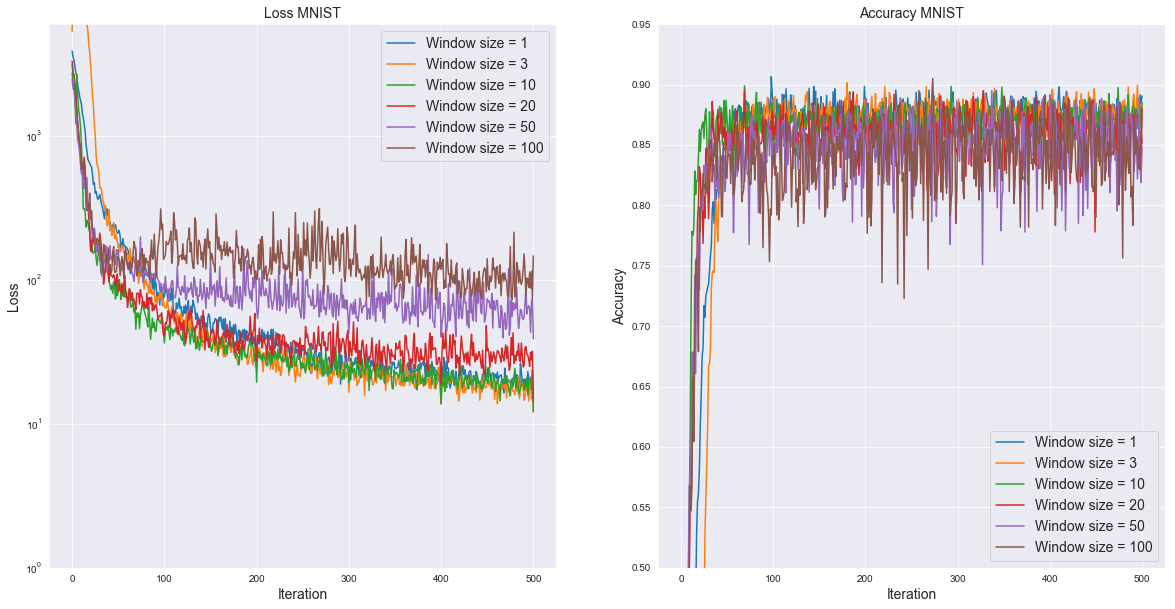

In [109]:
def opt_test_MNIST (optimizer,  
                    data,
                    num_steps = 500,
                    batch_size = 128,
                    display_step = 100):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = np.empty(num_steps+1)
    Accur = np.empty(num_steps+1)
    
    #Start training
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)

        for step in tqdm_notebook(range(0, num_steps+1)):
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            Loss[step], Accur[step], _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                Loss[step] = loss
                
                print("Step {:3}".format(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")
        return (Loss, Accur)

tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.5
num_steps = 500

x_range = np.arange(0, num_steps+1)
plt.figure(figsize=(20,10))
    
for window_size in [1, 3, 10, 20, 50, 100]:
    Loss, Accur = opt_test_MNIST(tf.contrib.opt.GGTOptimizer(learning_rate, window=window_size),
                                 mnist,
                                 num_steps,
                                 batch_size=2000)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.legend(['Window size = 1',
            'Window size = 3',
            'Window size = 10',
            'Window size = 20',
            'Window size = 50',
            'Window size = 100'], fontsize=14)
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylim(0.5, 0.95)
plt.legend(['Window size = 1',
            'Window size = 3',
            'Window size = 10',
            'Window size = 20',
            'Window size = 50',
            'Window size = 100'], fontsize=14)

plt.savefig("MNIST_GGT_window.png")
plt.show()